In [1]:
import seaborn as sns

In [80]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [82]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [83]:
df[(df['sex']=='male') & (df['class'] == 'Third')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
df.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [85]:
df.groupby(['sex', 'class'])['age'].median()

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_43790/196049239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'class'])['age'].median()


sex     class 
female  First     35.0
        Second    28.0
        Third     21.5
male    First     40.0
        Second    30.0
        Third     25.0
Name: age, dtype: float64

In [86]:
df.groupby(['sex', 'class'])['age'].median()

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_43790/196049239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'class'])['age'].median()


sex     class 
female  First     35.0
        Second    28.0
        Third     21.5
male    First     40.0
        Second    30.0
        Third     25.0
Name: age, dtype: float64

In [87]:
df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [88]:
df.groupby('class')['fare'].mean()

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_43790/4105422611.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['fare'].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [89]:
import pandas as pd

In [90]:
pd.pivot_table(
    df, 'age', 'sex', 'class', aggfunc="mean"
)

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_43790/3723219394.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


<Axes: xlabel='class', ylabel='age'>

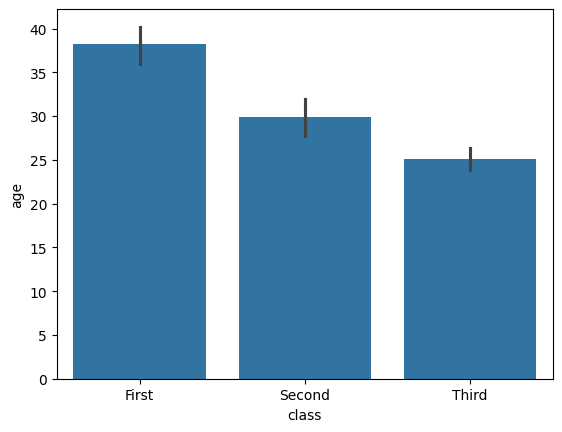

In [25]:
sns.barplot(df, x='class', y='age')

<Axes: xlabel='class', ylabel='Count'>

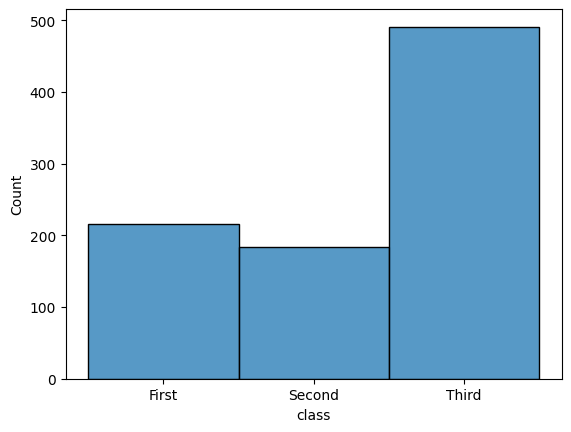

In [26]:
sns.histplot(df, x='class')

In [53]:
pd.crosstab(df["class"], df["embark_town"])

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


In [91]:
df_imp = df.copy()

In [92]:
age_median = (df.groupby(['sex', 'class'])['age'].transform("median"))

/var/folders/6p/kc5wj8m97yv4r_zm5y1n5kk00000gn/T/ipykernel_43790/4043766700.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_median = (df.groupby(['sex', 'class'])['age'].transform("median"))


In [93]:
age_median

0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: age, Length: 891, dtype: float64

In [94]:
df_imp['age'] = df_imp['age'].fillna(age_median)

In [95]:
df_imp.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: ylabel='age'>

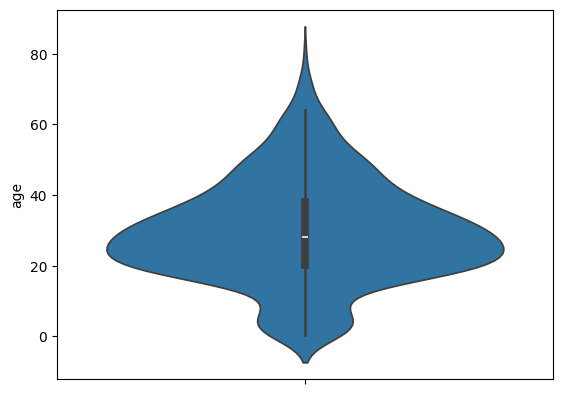

In [96]:
sns.violinplot(df['age'])
# sns.kdeplot(df_imp['age'])

In [97]:
df_imp.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [99]:
mask = (df_imp['class'] == 'First') & (df_imp['embark_town'].isna()) # 1등석 사람들 중에 출항지가 누락된 경우
mask

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [100]:
df_imp.loc[mask, 'embark_town'] = 'Southampton'

In [101]:
df_imp

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.5,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [102]:
df_imp['deck'] = df_imp['deck'].astype('category')

In [103]:
df_imp['deck'] = df_imp['deck'].cat.add_categories(['Unknown'])

In [104]:
df_imp['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [105]:
df_imp['deck'].fillna('Unknown')

0      Unknown
1            C
2      Unknown
3            C
4      Unknown
        ...   
886    Unknown
887          B
888    Unknown
889          C
890    Unknown
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [106]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [113]:
iris = sns.load_dataset('iris')

In [114]:
nums = iris.select_dtypes('number')

In [117]:
corr = nums.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [128]:
df.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


<Axes: >

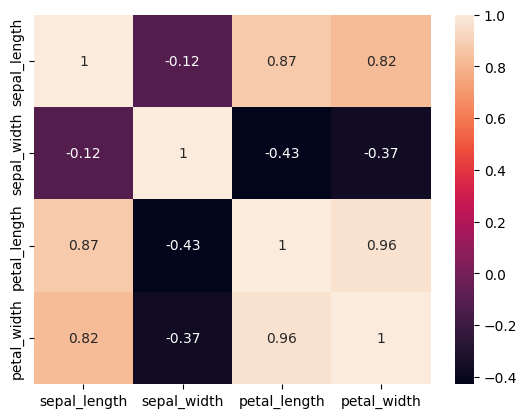

In [122]:
sns.heatmap(corr, annot=True)

<Axes: xlabel='petal_length', ylabel='petal_width'>

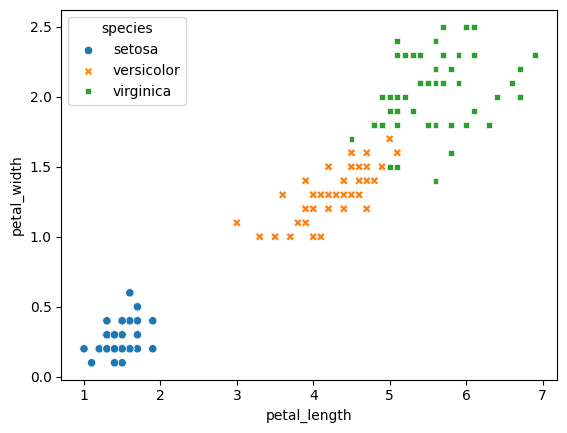

In [123]:
sns.scatterplot(iris, x='petal_length', y='petal_width', hue='species', style='species')

In [81]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [107]:
df_imp

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.5,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='fare'>

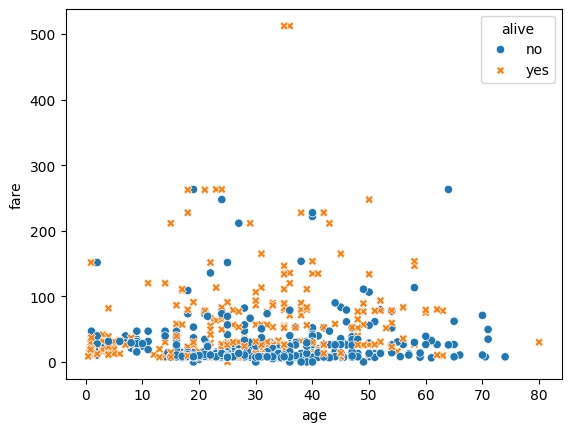

In [112]:
sns.scatterplot(df_imp, x='age', y='fare', hue='alive', style='alive')

In [129]:
!pip install pandas numpy scipy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 13.1 MB/s  0:00:01 eta 0:00:01
